### 1. Load data

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("df_test.csv").iloc[:,1:]
df

,putCall,symbol,description,exchangeName,bid,ask,last,mark,bidSize,askSize,...,deliverableNote,isIndexOption,percentChange,markChange,markPercentChange,intrinsicValue,pennyPilot,mini,inTheMoney,nonStandard
0,CALL,NVDA_121721C70,NVDA Dec 17 2021 70 Call,OPR,210.25,211.30,215.30,210.78,3,4,...,NaN,NaN,1.72,-0.88,-0.41,211.08,True,False,True,False
1,CALL,NVDA_012122C70,NVDA Jan 21 2022 70 Call,OPR,210.10,211.70,243.77,210.90,21,2,...,NaN,NaN,15.01,-1.05,-0.49,211.08,True,False,True,False
2,CALL,NVDA_061722C70,NVDA Jun 17 2022 70 Call,OPR,210.60,212.50,224.56,211.55,6,4,...,NaN,NaN,5.46,-1.39,-0.65,211.08,True,False,True,False
3,CALL,NVDA_091622C70,NVDA Sep 16 2022 70 Call,OPR,210.95,213.20,248.00,212.08,7,1,...,NaN,NaN,15.74,-2.20,-1.03,211.08,True,False,True,False
4,CALL,NVDA_012023C70,NVDA Jan 20 2023 70 Call,OPR,211.80,213.85,202.98,212.83,6,2,...,NaN,NaN,-5.50,-1.98,-0.92,211.08,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,PUT,NVDA_012023P118.75,NVDA Jan 20 2023 118.75 Put,OPR,3.15,3.60,3.20,3.38,3,221,...,NaN,NaN,-5.26,0.00,-0.08,-162.33,True,False,False,False
3238,PUT,NVDA_012023P121.25,NVDA Jan 20 2023 121.25 Put,OPR,3.35,3.80,3.55,3.58,24,253,...,NaN,NaN,-1.70,-0.04,-1.01,-159.83,True,False,False,False
3239,PUT,NVDA_012023P123.75,NVDA Jan 20 2023 123.75 Put,OPR,3.55,4.05,3.25,3.80,3,229,...,NaN,NaN,-15.66,-0.05,-1.39,-157.33,True,False,False,False
3240,PUT,NVDA_012023P126.25,NVDA Jan 20 2023 126.25 Put,OPR,3.75,4.25,4.57,4.00,237,249,...,NaN,NaN,11.58,-0.10,-2.33,-154.83,True,False,False,False


In [3]:
# df_viz = df_0900[['symbol', 'description', 
#              'putCall', 'expirationDate', 'strikePrice', 
#              'bid', 'ask', 'last', 'mark']]

# df_viz

# dfx["expiry"] = (pd.to_datetime(dfx['expirationDate'], unit='ms').dt.tz_localize('US/Eastern'))

,symbol,description,putCall,expirationDate,strikePrice,bid,ask,last,mark
0,NVDA_121721C70,NVDA Dec 17 2021 70 Call,CALL,1639774800000,70.00,210.25,211.30,215.30,210.78
1,NVDA_012122C70,NVDA Jan 21 2022 70 Call,CALL,1642798800000,70.00,210.10,211.70,243.77,210.90
2,NVDA_061722C70,NVDA Jun 17 2022 70 Call,CALL,1655496000000,70.00,210.60,212.50,224.56,211.55
3,NVDA_091622C70,NVDA Sep 16 2022 70 Call,CALL,1663358400000,70.00,210.95,213.20,248.00,212.08
4,NVDA_012023C70,NVDA Jan 20 2023 70 Call,CALL,1674248400000,70.00,211.80,213.85,202.98,212.83
...,...,...,...,...,...,...,...,...,...
3237,NVDA_012023P118.75,NVDA Jan 20 2023 118.75 Put,PUT,1674248400000,118.75,3.15,3.60,3.20,3.38
3238,NVDA_012023P121.25,NVDA Jan 20 2023 121.25 Put,PUT,1674248400000,121.25,3.35,3.80,3.55,3.58
3239,NVDA_012023P123.75,NVDA Jan 20 2023 123.75 Put,PUT,1674248400000,123.75,3.55,4.05,3.25,3.80
3240,NVDA_012023P126.25,NVDA Jan 20 2023 126.25 Put,PUT,1674248400000,126.25,3.75,4.25,4.57,4.00


### 2. Visualize option chain

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

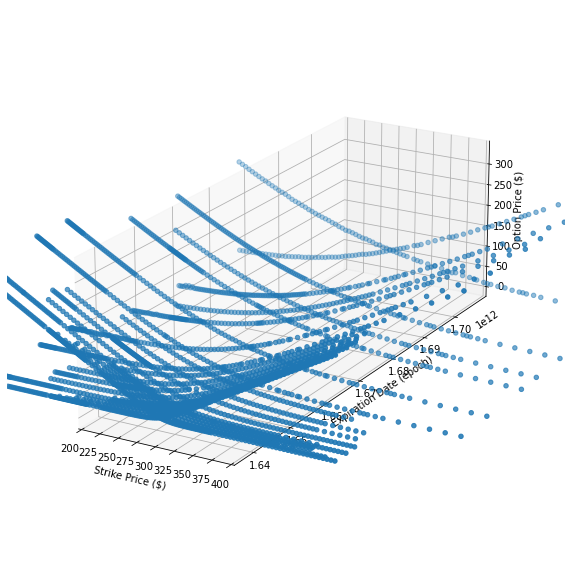

In [12]:
import streamlit as st

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

st.title("Today's NVDA Options Chain")
st.write("'We have to realize that computers are simulators and then figure out what to simulate.' \n\n — Alan Kay")

trend = st.slider('Trend',  min_value=0.001, max_value=0.10, step=0.01)
# #date = st.slider('Date', min_value='')
noise = st.slider('Noise', min_value=0.01,  max_value=0.10, step=0.01)
# st.write(f"Trend = {trend} \n\n Noise = {noise}")

x = df['strikePrice']
y = df['expirationDate']
z = df['mark']

fig = plt.figure(figsize=(10,100))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z)
ax.set_box_aspect((1, 3, 1))

ax.set_xlabel('Strike Price ($)')
ax.set_ylabel('Expiration Date (epoch)')
ax.set_zlabel('Option Price ($)')

ax.set_xlim(left=200, right=400)
#ax.set_ylim(bottom=1639774800000, top=1645496000000)
#ax.set_zlim(bottom=0, top=1000)

ax.view_init(20, -60)

st.pyplot(fig)